In [1]:
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #v3.4.3
import matplotlib
import seaborn as sns
import mplhep as hep
import ast
from statsmodels.tsa.stattools import acf

In [2]:
folder = '/eos/project/c/cmsml4dc/ML_2020/UL2018_Data/DF2018A_1D_Complete/'

In [3]:
list_of_files = glob("/eos/project/c/cmsml4dc/ML_2020/UL2018_Data/DF2018A_1D_Complete/*.csv")

## Define the essential display elements 

In [4]:
monitoring_elements = ['chargeInner_PXLayer_1',
                       'chargeInner_PXLayer_2',
                       'chargeInner_PXLayer_3',
                       'chargeInner_PXLayer_4',
                       'size_PXLayer_1',
                       'size_PXLayer_2',
                       'size_PXLayer_3',
                       'size_PXLayer_4']                      

In [7]:
essential_columns = ['fromrun','fromlumi','hname','histo','Xmin','Xmax','Xbins','entries']

In [10]:
# This function extract the essential monitoring element and rearrange data format for future illustration.
def extract_histo(df,histo_name):
    sub_df = df.copy()
    sub_df = sub_df[sub_df.hname == histo_name]
    sub_df = sub_df[essential_columns]
    return sub_df
    

In [12]:
# This function create DataFrame which contains the mean values of histograms for the particular run. 
def create_df_run(run=0):
    if run != 0 :
        df_run = df_all_files[df_all_files.fromrun == run]
    else : 
        df_run = df_all_files.copy()
    mean_list = []
    for index,row in df_run.iterrows():
        mean_val = 0
        histo_list = row['histo_list']
        Xbins = row['Xbins']
        entries = row['entries']
        if entries == 0 :
            mean_val = 0 
        else :    
            for i in range(1,len(histo_list)-1):
                mean_val += histo_list[i]*i/(sum(histo_list)-histo_list[0]-histo_list[1])
        mean_list.append(mean_val)
    df_run['mean'] = mean_list
    return df_run

## Data Acquisition

In [14]:
df_all_files = pd.DataFrame(columns=essential_columns)
for file in list_of_files:
    df = pd.read_csv(file)
    for me in monitoring_elements : 
        df_all_files = pd.concat([df_all_files,extract_histo(df,me)])

In [15]:
df_all_files['histo_list'] = df_all_files['histo'].apply(lambda x : ast.literal_eval(x))
df_all_files.sort_values(by=["fromrun", "fromlumi"], inplace=True)
df_all_files.reset_index(inplace=True, drop=True)
df_all_files.head()

,fromrun,fromlumi,hname,histo,Xmin,Xmax,Xbins,entries,histo_list
0,315257,1,chargeInner_PXLayer_1,"[0, 141, 373, 471, 587, 649, 616, 711, 757, 85...",0.0,80000.0,100,170388,"[0, 141, 373, 471, 587, 649, 616, 711, 757, 85..."
1,315257,1,chargeInner_PXLayer_2,"[0, 0, 22, 82, 129, 184, 190, 229, 237, 256, 2...",0.0,80000.0,100,127234,"[0, 0, 22, 82, 129, 184, 190, 229, 237, 256, 2..."
2,315257,1,chargeInner_PXLayer_3,"[0, 0, 0, 23, 39, 67, 73, 81, 67, 74, 91, 93, ...",0.0,80000.0,100,103411,"[0, 0, 0, 23, 39, 67, 73, 81, 67, 74, 91, 93, ..."
3,315257,1,chargeInner_PXLayer_4,"[0, 0, 0, 3, 24, 31, 54, 36, 47, 64, 47, 65, 5...",0.0,80000.0,100,86966,"[0, 0, 0, 3, 24, 31, 54, 36, 47, 64, 47, 65, 5..."
4,315257,1,size_PXLayer_1,"[0, 0, 34968, 66341, 48047, 31898, 24301, 1942...",0.0,30.0,30,325121,"[0, 0, 34968, 66341, 48047, 31898, 24301, 1942..."


In [17]:
run_list = df_all_files.fromrun.unique()
run_list

array([315257, 315258, 315259, 315264, 315265, 315267, 315270, 315322,
       315339, 315357, 315361, 315363, 315365, 315366, 315420, 315488,
       315489, 315490, 315506, 315509, 315510, 315512, 315543, 315555,
       315556, 315557, 315640, 315641, 315642, 315644, 315645, 315646,
       315647, 315648, 315689, 315690, 315702, 315703, 315704, 315705,
       315713, 315721, 315741, 315764, 315770, 315784, 315785, 315786,
       315790, 315800, 315801, 315840, 315973, 315974, 316058, 316059,
       316060, 316061, 316062, 316082, 316109, 316110, 316111, 316112,
       316113, 316114, 316151, 316153, 316186, 316187, 316199, 316200,
       316201, 316202, 316216, 316217, 316218, 316219, 316239, 316240,
       316241, 316271, 316361, 316362, 316363, 316377, 316378, 316379,
       316380, 316455, 316456, 316457, 316469, 316470, 316472, 316505,
       316569, 316590, 316613, 316615, 316664, 316665, 316666, 316667,
       316700, 316701, 316702, 316715, 316716, 316717, 316718, 316719,
      

In [18]:
df_run = create_df_run()

In [19]:
mean = df_run.pivot_table(index=['fromrun','fromlumi'],columns='hname')['mean']
mean

hname             chargeInner_PXLayer_1  chargeInner_PXLayer_2  \
fromrun fromlumi                                                 
315257  1                     28.228703              27.072756   
        2                     28.091170              27.090515   
        3                     28.101980              27.032802   
        4                     28.173658              27.080559   
        5                     28.193177              27.003435   
...                                 ...                    ...   
316995  634                    0.000000               0.000000   
        635                    0.000000               0.000000   
        636                    0.000000               0.000000   
        637                    0.000000               0.000000   
        638                    0.000000               0.000000   

hname             chargeInner_PXLayer_3  chargeInner_PXLayer_4  \
fromrun fromlumi                                                 
315257  1                     29.700100              30.220845   
        2                     29.753293              30.311680   
        3                     29.669463              30.221654   
        4                     29.738373              30.233255   
        5                     29.672202              30.283259   
...                                 ...                    ...   
316995  634                    0.000000               0.000000   
        635                    0.000000               0.000000   
        636                    0.000000               0.000000   
        637                    0.000000               0.000000   
        638                    0.000000               0.000000   

hname             size_PXLayer_1  size_PXLayer_2  size_PXLayer_3  \
fromrun fromlumi                                                   
315257  1               6.499199        5.177683        4.629237   
        2               6.503749        5.179035        4.626842   
        3               6.492826        5.158502        4.630422   
        4               6.505969        5.176763        4.629869   
        5               6.511939        5.170738        4.637206   
...                          ...             ...             ...   
316995  634             0.000000        0.000000        0.000000   
        635             0.000000        0.000000        0.000000   
        636             0.000000        0.000000        0.000000   
        637             0.000000        0.000000        0.000000   
        638             0.000000        0.000000        0.000000   

hname             size_PXLayer_4  
fromrun fromlumi                  
315257  1               4.198259  
        2               4.198932  
        3               4.199699  
        4               4.197872  
        5               4.204561  
...                          ...  
316995  634             0.000000  
        635             0.000000  
        636             0.000000  
        637             0.000000  
        638             0.000000  

[61153 rows x 8 columns]

## Correlation between each histogram monitoring element 

In [24]:
corr = mean.reset_index(drop=True)
corr.corr()

hname,chargeInner_PXLayer_1,chargeInner_PXLayer_2,chargeInner_PXLayer_3,chargeInner_PXLayer_4,size_PXLayer_1,size_PXLayer_2,size_PXLayer_3,size_PXLayer_4
hname,,,,,,,,
chargeInner_PXLayer_1,1.000000,0.973880,0.974507,0.975851,0.994609,0.975494,0.974464,0.973420
chargeInner_PXLayer_2,0.973880,1.000000,0.999876,0.999360,0.969536,0.995239,0.995762,0.996028
chargeInner_PXLayer_3,0.974507,0.999876,1.000000,0.999332,0.970076,0.995035,0.995583,0.995784
chargeInner_PXLayer_4,0.975851,0.999360,0.999332,1.000000,0.973517,0.997787,0.998153,0.998307
size_PXLayer_1,0.994609,0.969536,0.970076,0.973517,1.000000,0.976275,0.975228,0.974107
size_PXLayer_2,0.975494,0.995239,0.995035,0.997787,0.976275,1.000000,0.999884,0.999765
size_PXLayer_3,0.974464,0.995762,0.995583,0.998153,0.975228,0.999884,1.000000,0.999899
size_PXLayer_4,0.973420,0.996028,0.995784,0.998307,0.974107,0.999765,0.999899,1.000000


<AxesSubplot:xlabel='hname', ylabel='hname'>

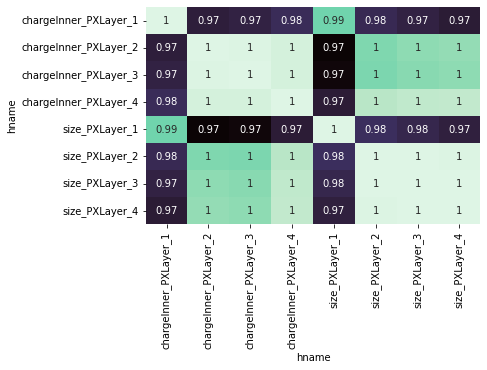

In [25]:
sns.heatmap(corr.corr(),cmap='mako',annot=True,cbar=False)

# All Run histogram mean display

From correlation shows above, instead analysing both charge and size of pixel layer, we could easily consider either charge or size. 

Text(0.5, 0, 'Lumisection')

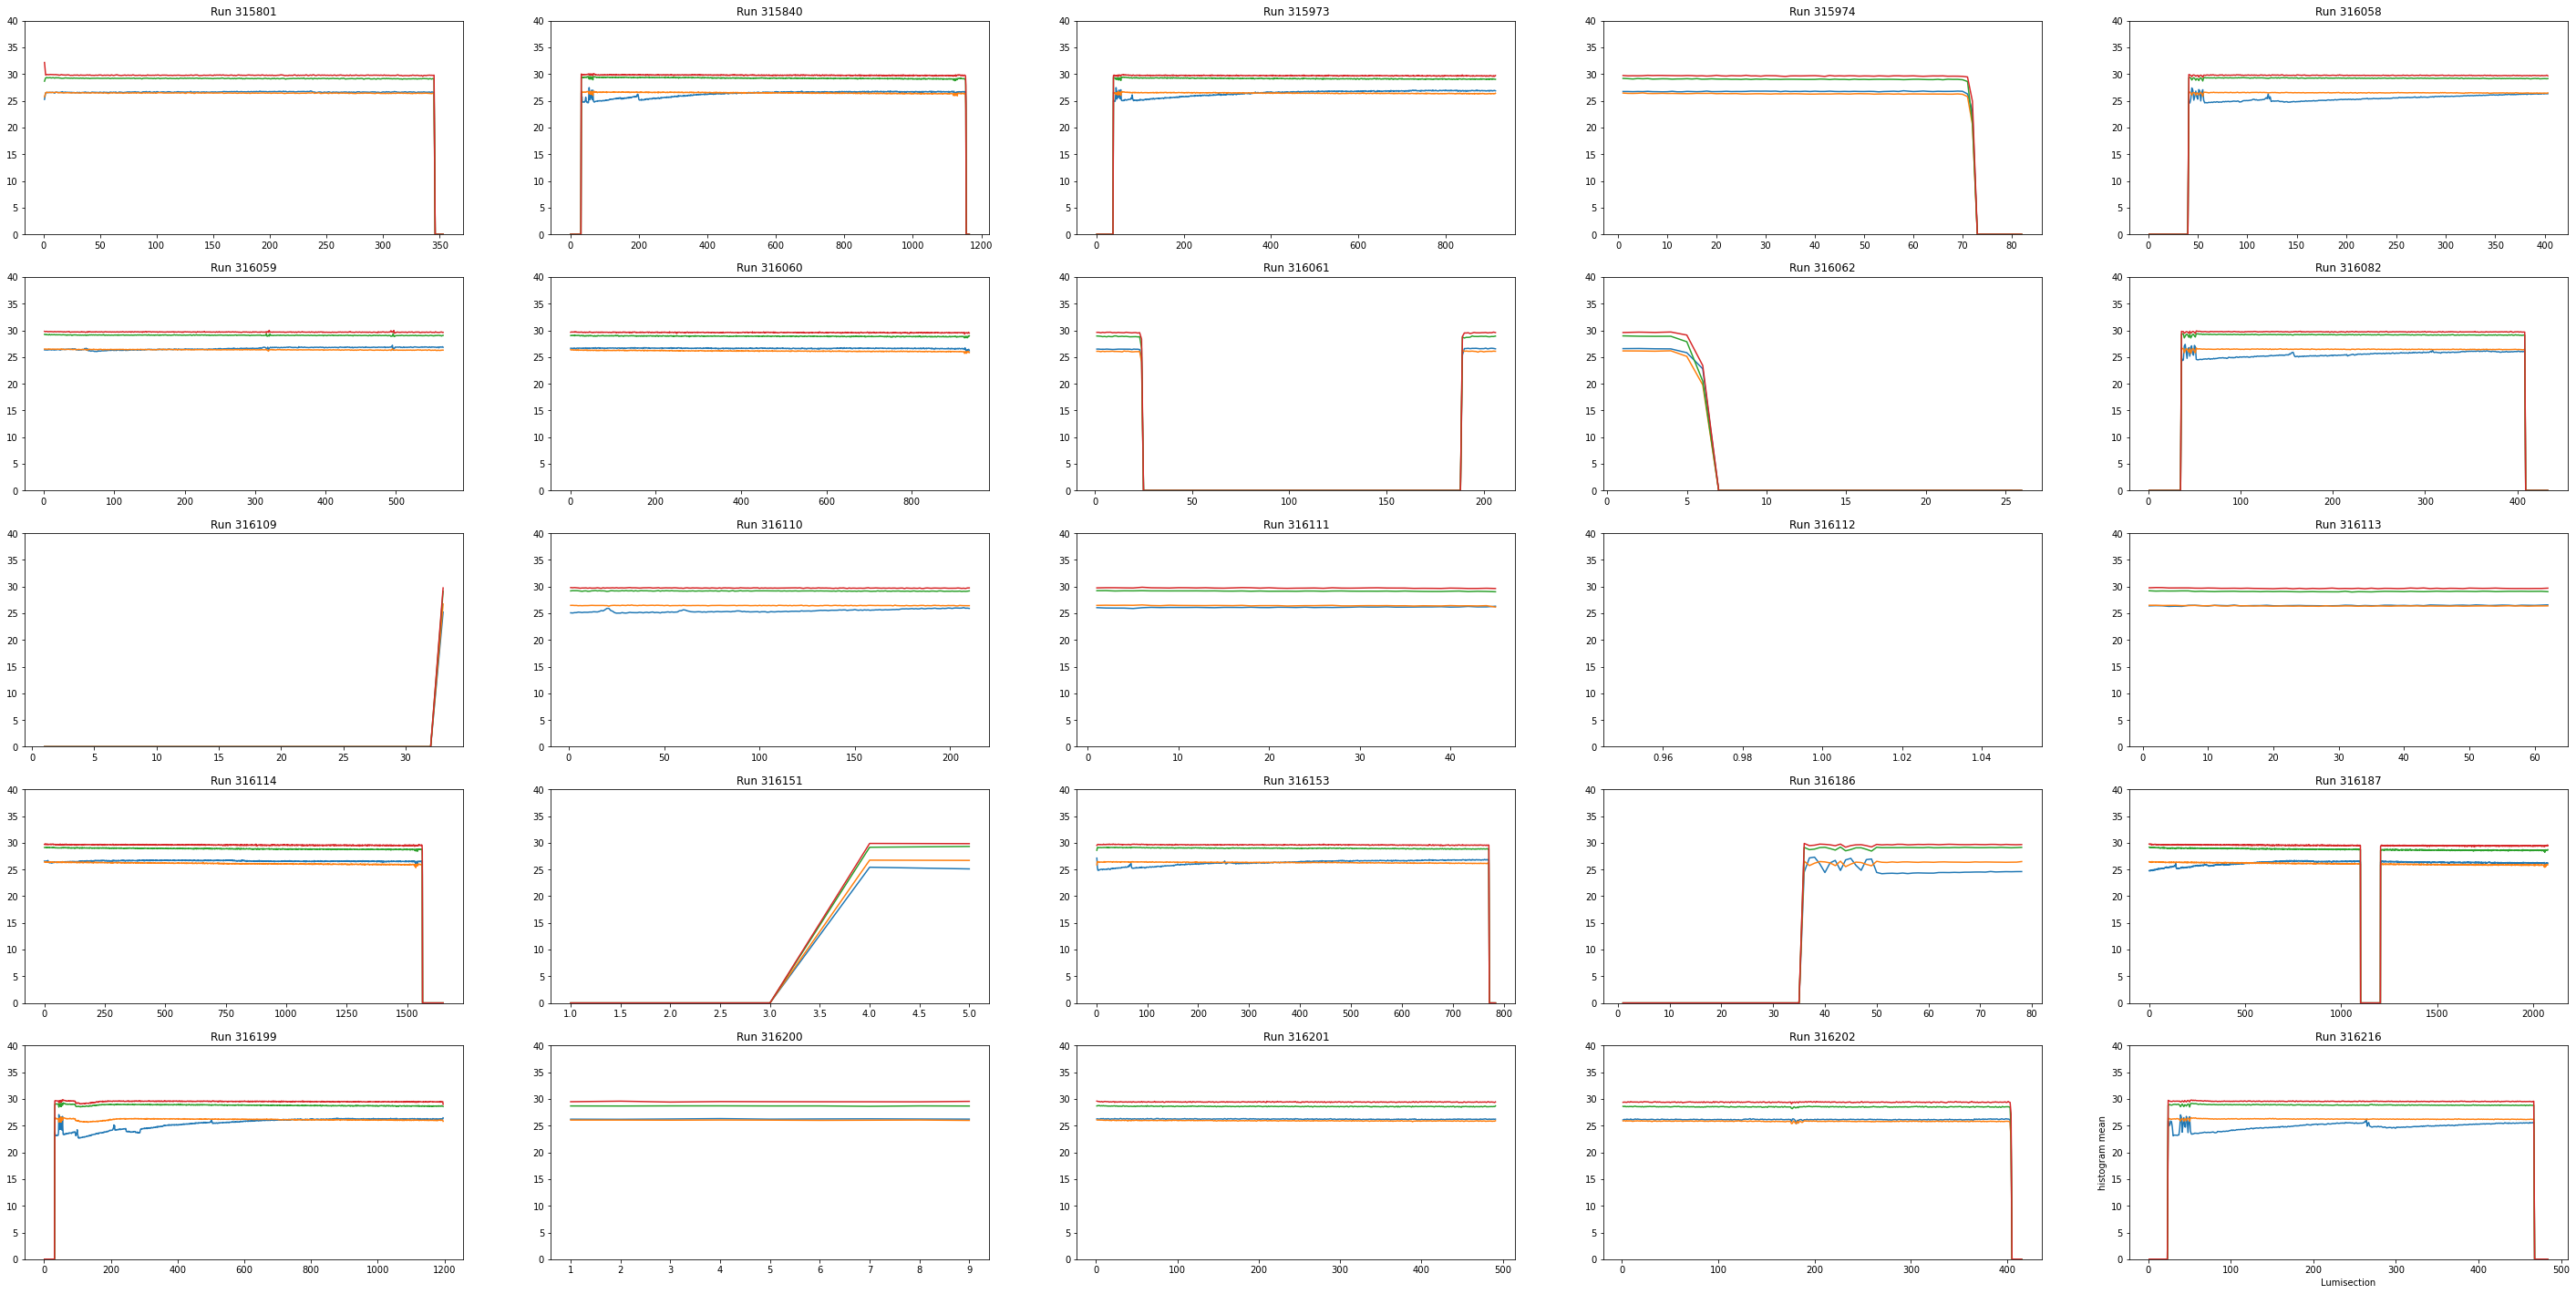

In [20]:
plt.subplots(5,5,figsize=(50,25))
for i in range(25):
    plt.subplot(5,5,i+1)
    for me in monitoring_elements[:4]:
        plt.plot(mean[me].loc[run_list[i+50]],label=mean.columns)
    plt.ylim(0,40)
    plt.title('Run '+str(run_list[i+50]))
plt.ylabel('histogram mean')
plt.xlabel('Lumisection')


Text(0.5, 0, 'Lumisection')

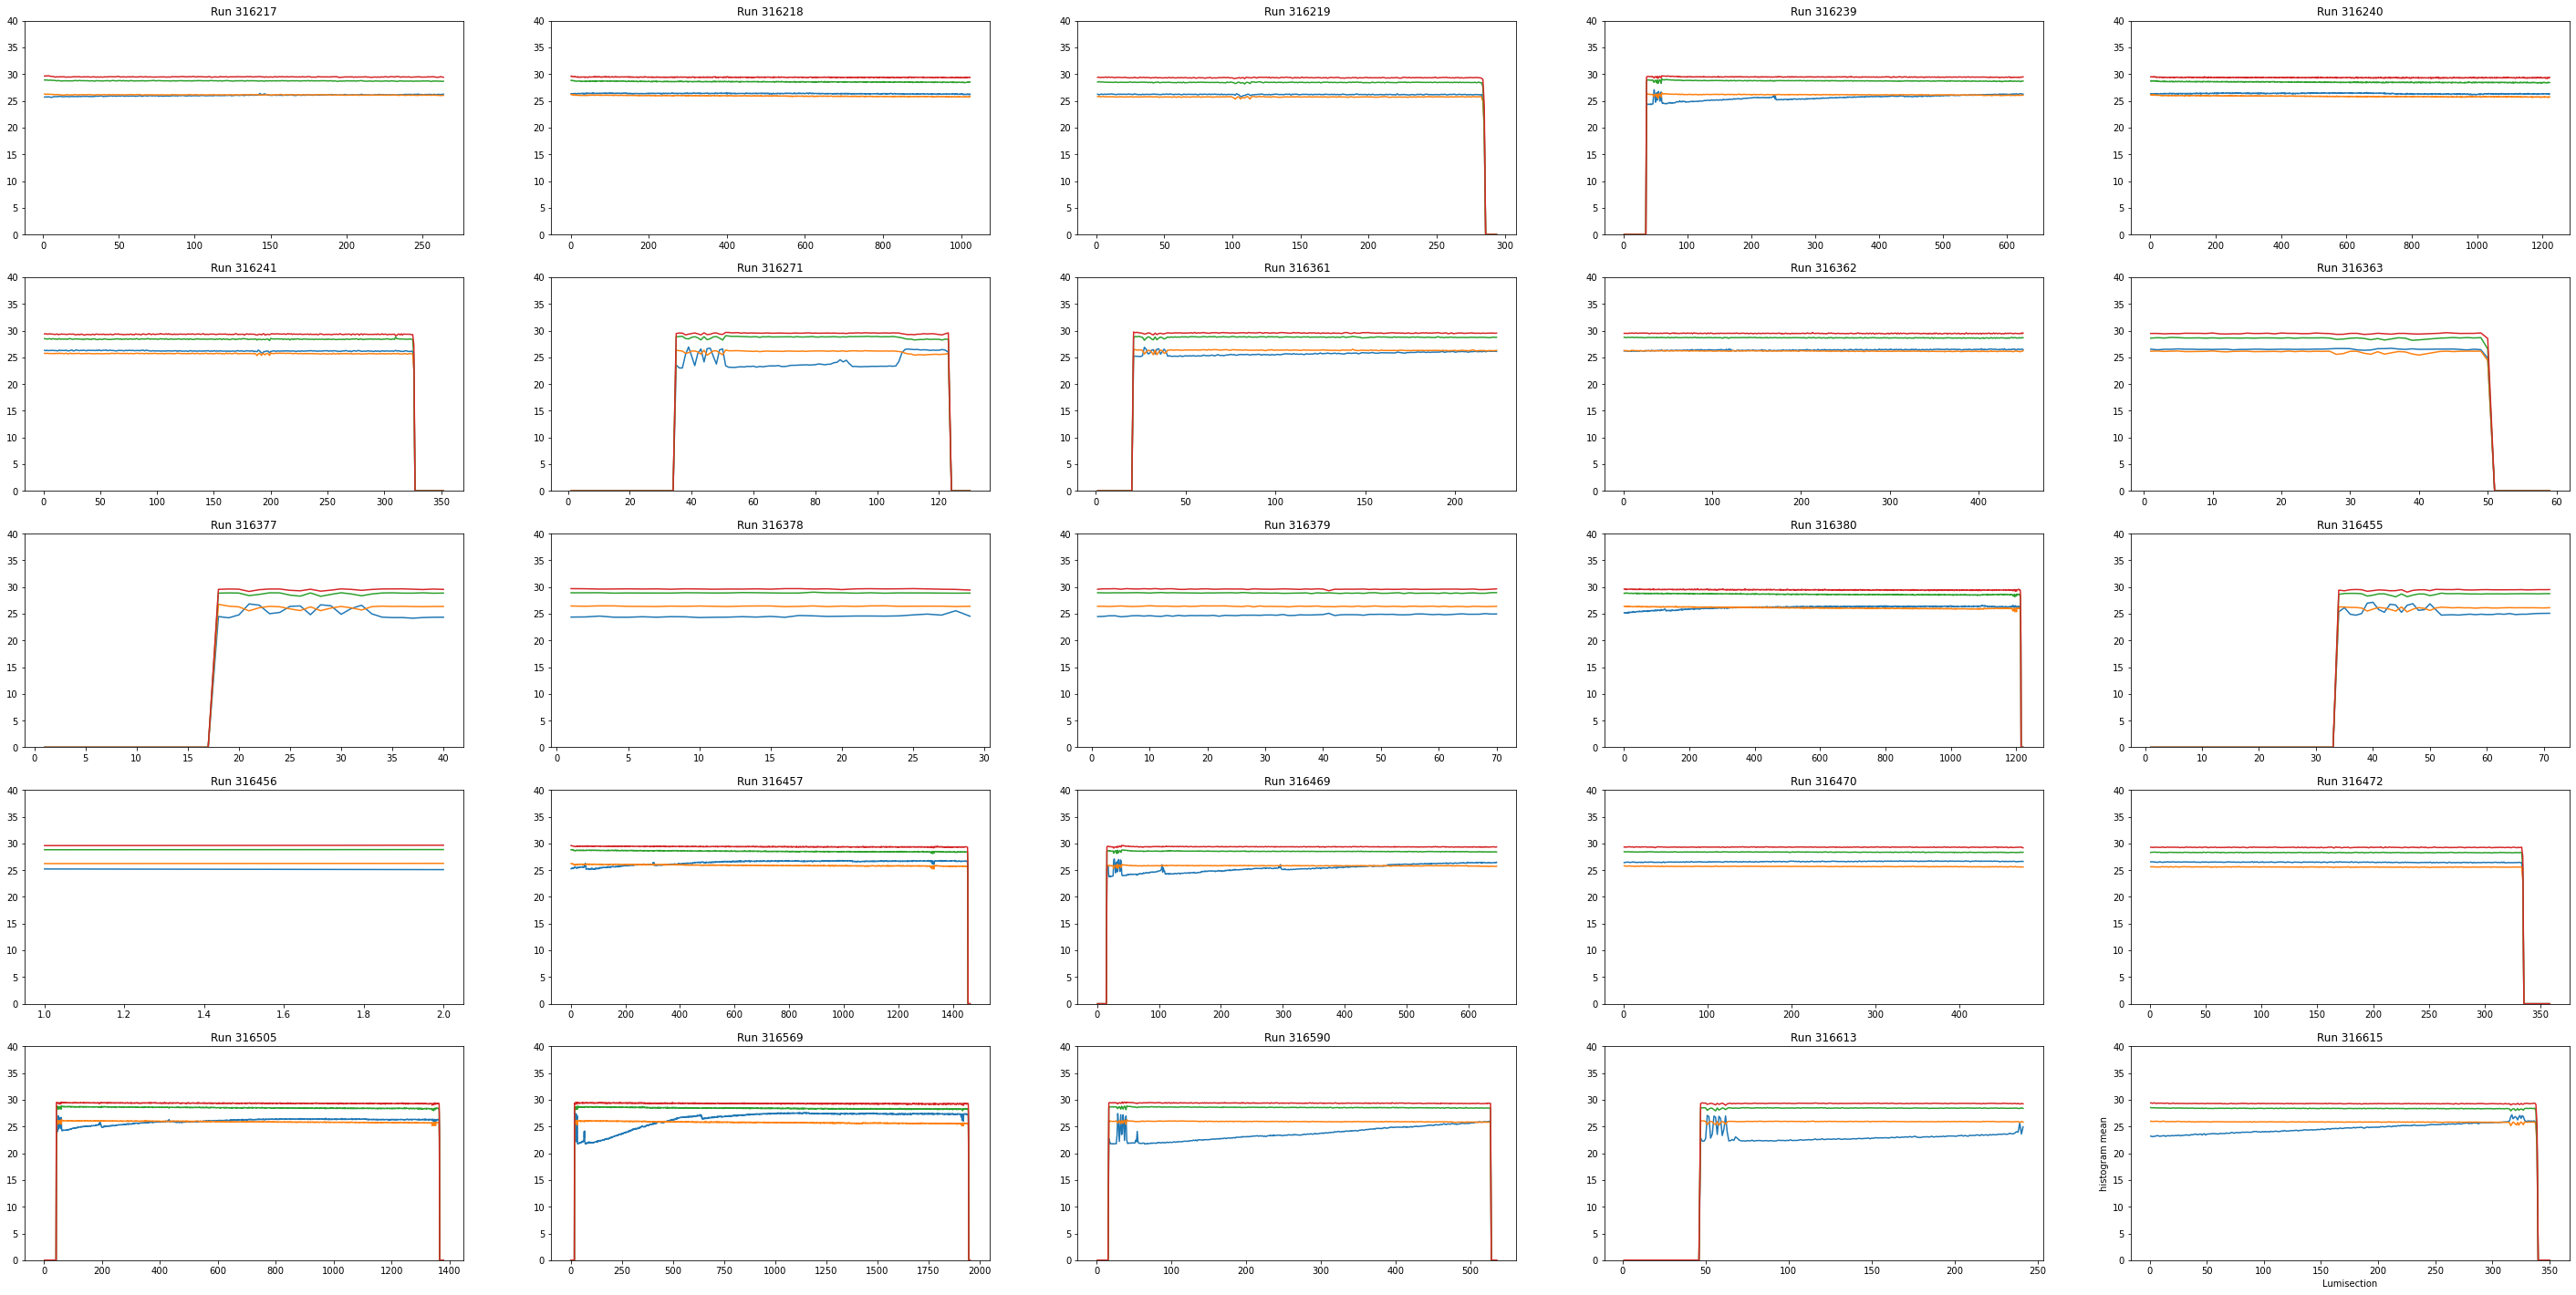

In [21]:
plt.subplots(5,5,figsize=(50,25))
for i in range(25):
    plt.subplot(5,5,i+1)
    for me in monitoring_elements[:4]:
        plt.plot(mean[me].loc[run_list[i+75]],label=mean.columns)
    plt.ylim(0,40)
    plt.title('Run '+str(run_list[i+75]))
plt.ylabel('histogram mean')
plt.xlabel('Lumisection')


Text(0.5, 0, 'Lumisection')

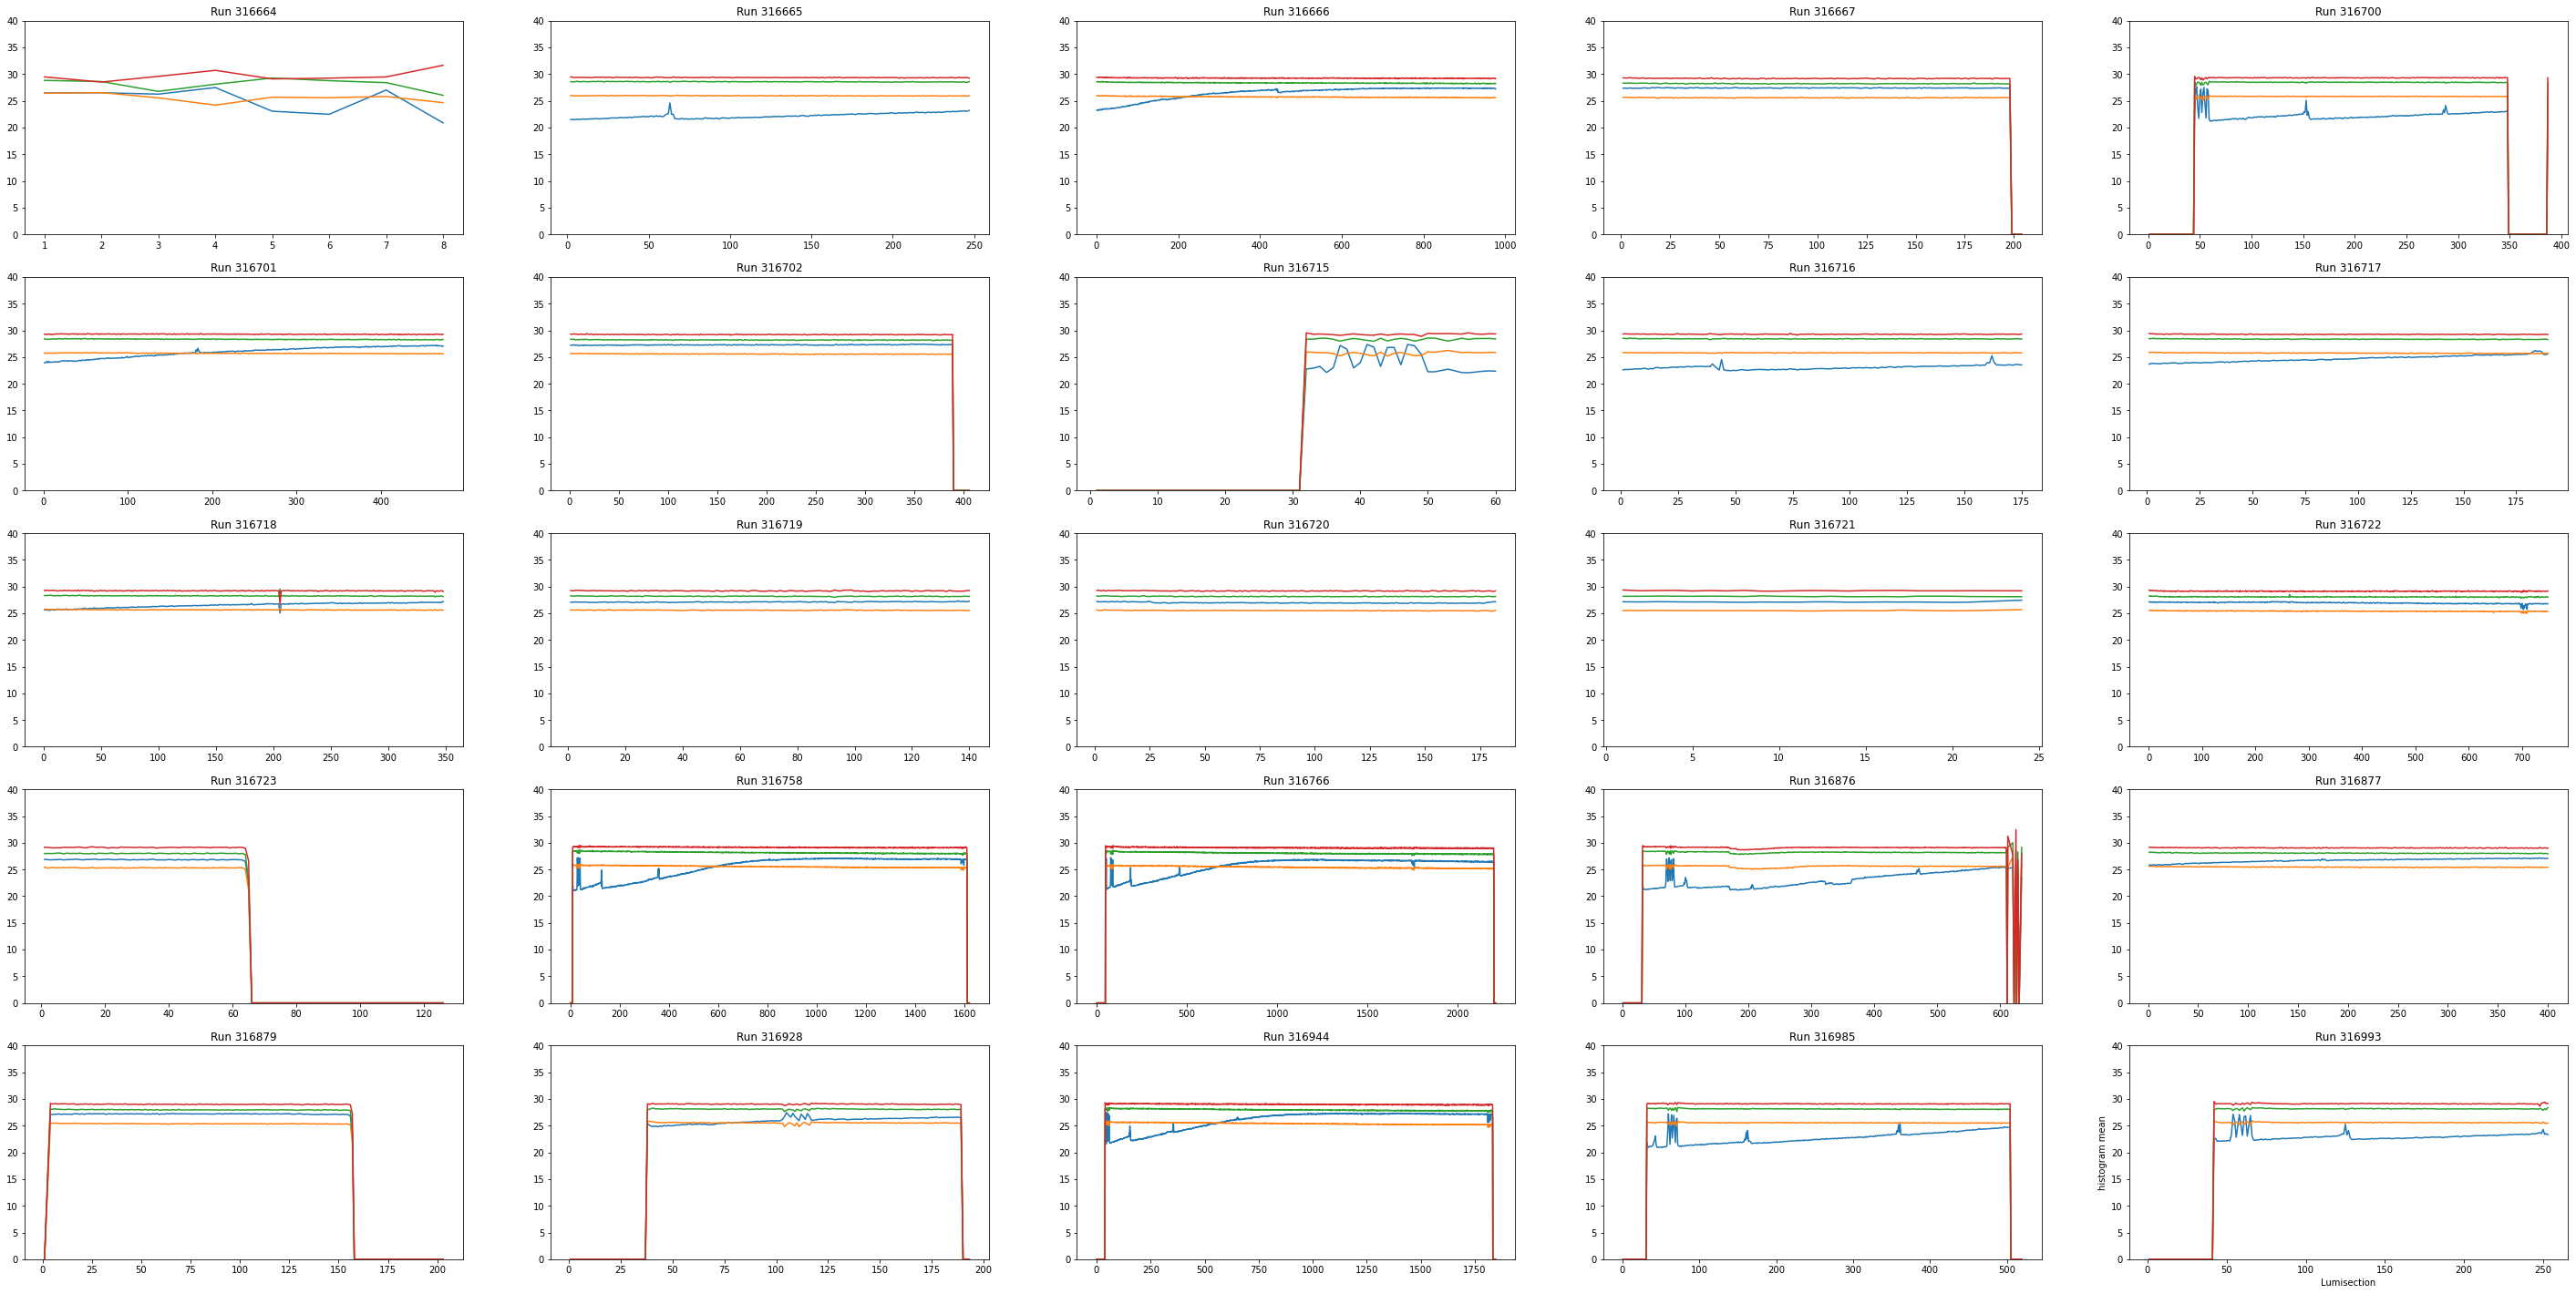

In [22]:
plt.subplots(5,5,figsize=(50,25))
for i in range(25):
    plt.subplot(5,5,i+1)
    for me in monitoring_elements[:4]:
        plt.plot(mean[me].loc[run_list[i+100]],label=mean.columns)
    plt.ylim(0,40)
    plt.title('Run '+str(run_list[i+100]))
plt.ylabel('histogram mean')
plt.xlabel('Lumisection')

Text(0.5, 0, 'Lumisection')

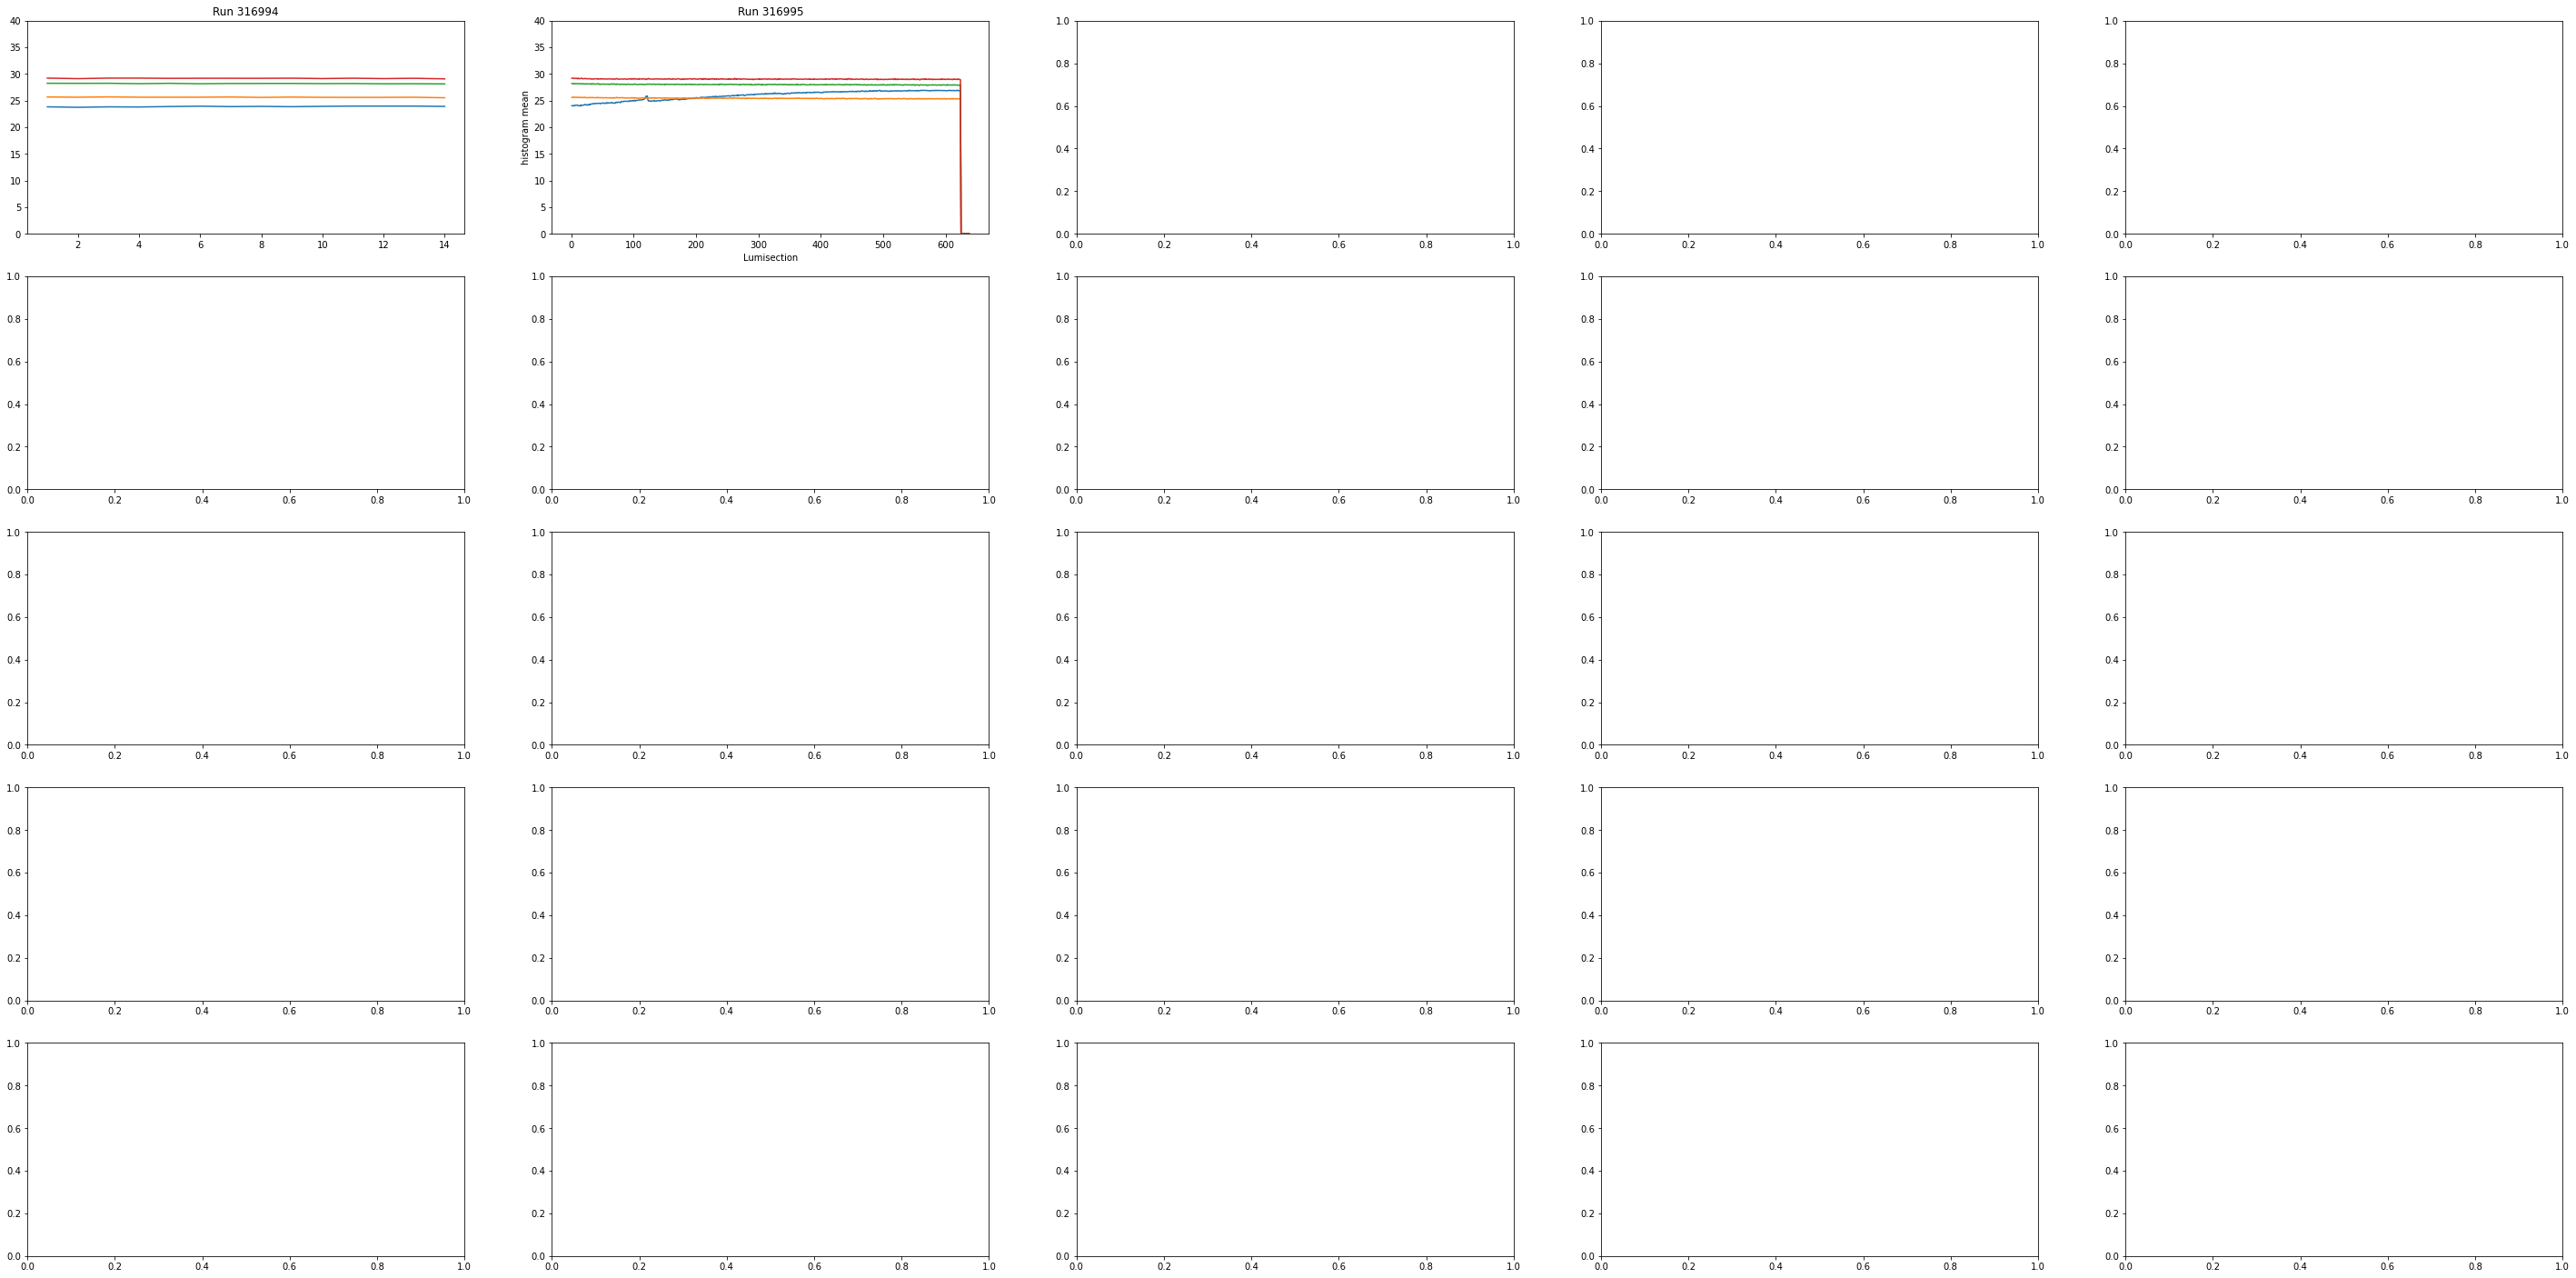

In [23]:
plt.subplots(5,5,figsize=(50,25))
for i in range(2):
    plt.subplot(5,5,i+1)
    for me in monitoring_elements[:4]:
        plt.plot(mean[me].loc[run_list[i+125]],label=mean.columns)
    plt.ylim(0,40)
    plt.title('Run '+str(run_list[i+125]))
plt.ylabel('histogram mean')
plt.xlabel('Lumisection')